In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
#import 2018 data
survey_2018 = pd.read_csv("raw data/OSMI2018_cleaned.csv")
#import 2017 data
survey_2017 = pd.read_csv("raw data/OSMI2017_cleaned.csv")
#import 2016 data
survey_2016 = pd.read_csv("raw data/OSMI2016_cleaned.csv")

In [3]:
#filter so that df just contains United States results - not enough responses from other countries to draw conclusions
survey_2018 = survey_2018.loc[survey_2018["country"]== "United States of America", :]
survey_2017 = survey_2017.loc[survey_2017["country"]== "United States of America", :]
survey_2016 = survey_2016.loc[survey_2016["country"]== "United States of America", :]

In [4]:
#start looking at descriptives

age_2018 = round(survey_2018["age"].mean(), 2)
age_2017 = round(survey_2017["age"].mean(), 2)
age_2016 = round(survey_2016["age"].mean(), 2)

#create bins for age ranges
age_bins = [17, 25, 35, 45, 55, 65, 75, 90]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
survey_2018["age_ranges"]= pd.cut(survey_2018["age"], age_bins, labels=age_labels)
survey_2017["age_ranges"]= pd.cut(survey_2017["age"], age_bins, labels=age_labels)
survey_2016["age_ranges"]= pd.cut(survey_2016["age"], age_bins, labels=age_labels)

In [5]:
#print mean age and counts of age ranges for respondents
print(f"mean age of respondent for 2018 is {age_2018}")
print(f"mean age of respondent for 2017 is {age_2017}")
print(f"mean age of respondent for 2016 is {age_2016}")

#find counts for 2018 for each age group
a = survey_2018.groupby("age_ranges").count()
a = a.reset_index()
age_counts_2018  = a[["age_ranges", "#"]]
age_counts_2018 = age_counts_2018.rename(columns={"#": "2018"})
age_counts_2018

#find counts for 2017 for each age group
b = survey_2017.groupby("age_ranges").count()
b = b.reset_index()
age_counts_2017  = b[["age_ranges", "#"]]
age_counts_2017 = age_counts_2017.rename(columns={"#": "2017"})
age_counts_2017

#find counts for 2016 for each age group
c = survey_2016.groupby("age_ranges").count()
c = c.reset_index()
age_counts_2016  = c[["age_ranges", "size"]]
age_counts_2016 = age_counts_2016.rename(columns={"size": "2016"})
age_counts_2016

#merge dataframes
combo_age_counts = pd.merge(age_counts_2017, age_counts_2018, on="age_ranges")
combo_age_counts = pd.merge(age_counts_2016, combo_age_counts, on= "age_ranges", how = "outer")
combo_age_counts

mean age of respondent for 2018 is 34.78
mean age of respondent for 2017 is 35.24
mean age of respondent for 2016 is 34.38


,age_ranges,2016,2017,2018
0,18-24,86,46,25
1,25-34,377,208,135
2,35-44,193,149,101
3,45-54,45,46,17
4,55-64,10,6,5
5,65-74,3,1,0
6,75+,0,0,0


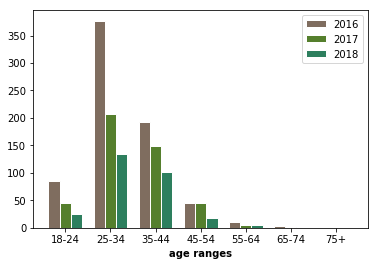

In [10]:
#bar graph to plot age ranges and years

#put age ranges in a list
groups = combo_age_counts["age_ranges"].to_list()
#set bar width
barWidth = 0.25
#set heights of bars
bars_2016 = combo_age_counts["2016"].to_list()
bars_2017 = combo_age_counts["2017"].to_list()
bars_2018 = combo_age_counts["2018"].to_list()

#set position of bar on X axis
r_2016 = np.arange(len(bars_2016))
r_2017 = [x + barWidth for x in r_2016]
r_2018 = [x + barWidth for x in r_2017]

fig = plt.figure()
#make the plot
plt.bar(r_2016, bars_2016, color='#7f6d5f', width=barWidth, edgecolor='white', label='2016')
plt.bar(r_2017, bars_2017, color='#557f2d', width=barWidth, edgecolor='white', label= '2017')
plt.bar(r_2018, bars_2018, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')

#add xticks on the middle of the group bars
plt.xlabel('age ranges', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars_2016))], groups)

#create legend
plt.legend()

#export to file
fig.savefig("age_groups.png")

#show plot
plt.show()

In [90]:
#gender counts 2018
gender_2018 = survey_2018.groupby("gender").count()
gender_2018 = gender_2018.reset_index()
gender_counts_2018 = gender_2018[["gender", "#"]]
gender_counts_2018 = gender_counts_2018.rename(columns={"#": "2018"})
gender_counts_2018

#gender counts 2017
gender_2017 = survey_2017.groupby("gender").count()
gender_2017 = gender_2017.reset_index()
gender_counts_2017 = gender_2017[["gender", "#"]]
gender_counts_2017 = gender_counts_2017.rename(columns={"#": "2017"})
gender_counts_2017

#gender counts 2016
gender_2016 = survey_2016.groupby("gender").count()
gender_2016 = gender_2016.reset_index()
gender_counts_2016 = gender_2016[["gender", "size"]]
gender_counts_2016 = gender_counts_2016.rename(columns={"size": "2016"})
gender_counts_2016

#merge dataframes
combo_gender_counts = pd.merge(gender_counts_2017, gender_counts_2018, on="gender")
combo_gender_counts = pd.merge(gender_counts_2016, combo_gender_counts, on = "gender")
combo_gender_counts

,gender,2016,2017,2018
0,F,200,159,94
1,M,501,279,173
2,Nonbinary,3,6,6
3,Other,9,7,6


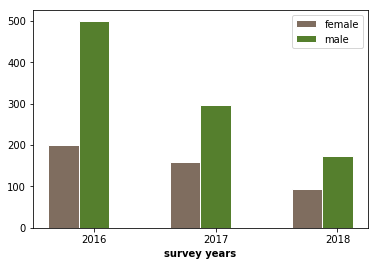

In [11]:
#bar graph to plot genders and years

#put age ranges in a list
years = ["2016", "2017", "2018"]
#set bar width
barWidth = 0.25
#set heights of bars
bars_f = [200, 159, 94]
bars_m = [501, 297, 173]


#set position of bar on X axis
r_f = np.arange(len(bars_f))
r_m = [x + barWidth for x in r_f]

fig = plt.figure()
#make the plot
plt.bar(r_f, bars_f, color='#7f6d5f', width=barWidth, edgecolor='white', label='female')
plt.bar(r_m, bars_m, color='#557f2d', width=barWidth, edgecolor='white', label= 'male')

#add xticks on the middle of the group bars
plt.xlabel('survey years', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars_f))], years)

#create legend
plt.legend()

#export to file
fig.savefig("gender.png")

#show plot
plt.show()

In [92]:
#number of responses per state - 2018

states_2018 = survey_2018.groupby("state").count()
states_2018 = states_2018.reset_index()
states_2018 = states_2018[["state", "#"]]
states_2018 = states_2018.rename(columns={"#": "2018"})
states_2018

#number of responses per state - 2017
states_2017 = survey_2017.groupby("state").count()
states_2017 = states_2017.reset_index()
states_2017 = states_2017[["state", "#"]]
states_2017 = states_2017.rename(columns={"#": "2017"})
states_2017

#number of responses per state - 2016
states_2016 = survey_2016.groupby("state").count()
states_2016 = states_2016.reset_index()
states_2016 = states_2016[["state", "size"]]
states_2016 = states_2016.rename(columns={"size": "2016"})
states_2016

#merge dataframes
combo_states = pd.merge(states_2017, states_2018, on = "state", how="outer")
combo_states = pd.merge(states_2016, combo_states, on = "state", how = "outer")
combo_states

,state,2016,2017,2018
0,Alabama,4.0,4.0,1.0
1,Alaska,2.0,1.0,NaN
2,Arizona,5.0,3.0,1.0
3,California,120.0,60.0,36.0
4,Colorado,21.0,4.0,2.0
5,Connecticut,3.0,2.0,1.0
6,Delaware,1.0,NaN,NaN
7,District of Columbia,6.0,4.0,2.0
8,Florida,16.0,3.0,11.0
9,Georgia,11.0,8.0,5.0


In [95]:
# number with current MH disorder - 2018
current_mhdx_2018 = survey_2018.groupby("current MH disorder").count()
current_mhdx_2018 = current_mhdx_2018.reset_index()
current_mhdx_2018 = current_mhdx_2018[["current MH disorder", "#"]]
current_mhdx_2018 = current_mhdx_2018.rename(columns={"#": "2018"})
current_mhdx_2018

#number with current MH disorder - 2017
current_mhdx_2017 = survey_2017.groupby("current MH disorder").count()
current_mhdx_2017 = current_mhdx_2017.reset_index()
current_mhdx_2017 = current_mhdx_2017[["current MH disorder", "#"]]
current_mhdx_2017 = current_mhdx_2017.rename(columns={"#": "2017", })
current_mhdx_2017

#number with current MH disorder - 2016
current_mhdx_2016 = survey_2016.groupby("current mh disorder").count()
current_mhdx_2016 = current_mhdx_2016.reset_index()
current_mhdx_2016 = current_mhdx_2016[["current mh disorder", "size"]]
current_mhdx_2016 = current_mhdx_2016.rename(columns={"size": "2016", "current mh disorder": "current MH disorder"})
current_mhdx_2016

#join dataframes

combo_current_mhdx = pd.merge(current_mhdx_2017, current_mhdx_2018, on="current MH disorder")
combo_current_mhdx = pd.merge(current_mhdx_2016, combo_current_mhdx, on="current MH disorder")
combo_current_mhdx

,current MH disorder,2016,2017,2018
0,No,237,116,65
1,Yes,329,223,146


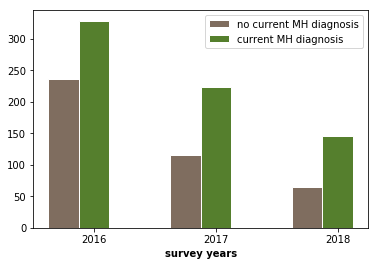

In [12]:
#bar graph to plot current MH disorder and years

#put age ranges in a list
years = ["2016", "2017", "2018"]
#set bar width
barWidth = 0.25
#set heights of bars
bars_no = [237, 116, 65]
bars_yes = [329, 223, 146]


#set position of bar on X axis
r_no = np.arange(len(bars_no))
r_yes = [x + barWidth for x in r_no]

fig = plt.figure()
#make the plot
plt.bar(r_no, bars_no, color='#7f6d5f', width=barWidth, edgecolor='white', label='no current MH diagnosis')
plt.bar(r_yes, bars_yes, color='#557f2d', width=barWidth, edgecolor='white', label= 'current MH diagnosis')

#add xticks on the middle of the group bars
plt.xlabel('survey years', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars_no))], years)

#create legend
plt.legend()

#export to file
fig.savefig("current_mh.png")

#show plot
plt.show()


In [96]:
#number with past MH disorder - 2018
past_mhdx_2018 = survey_2018.groupby("past mh disorder").count()
past_mhdx_2018 = past_mhdx_2018.reset_index()
past_mhdx_2018 = past_mhdx_2018[["past mh disorder", "#"]]
past_mhdx_2018 = past_mhdx_2018.rename(columns = {"#": "2018"})
past_mhdx_2018

#number with past MH disorder - 2017
past_mhdx_2017 = survey_2017.groupby("past mh disorder").count()
past_mhdx_2017 = past_mhdx_2017.reset_index()
past_mhdx_2017 = past_mhdx_2017[["past mh disorder", "#"]]
past_mhdx_2017 = past_mhdx_2017.rename(columns = {"#": "2017"})
past_mhdx_2017

#number with past MH disorder - 2016
past_mhdx_2016 = survey_2016.groupby("past mh disorder").count()
past_mhdx_2016 = past_mhdx_2016.reset_index()
past_mhdx_2016 = past_mhdx_2016[["past mh disorder", "size"]]
past_mhdx_2016 = past_mhdx_2016.rename(columns = {"size": "2016"})
past_mhdx_2016

#merge dataframes
combo_past_mhdx = pd.merge(past_mhdx_2017, past_mhdx_2018, on = "past mh disorder")
combo_past_mhdx = pd.merge(past_mhdx_2016, combo_past_mhdx, on = "past mh disorder")
combo_past_mhdx

,past mh disorder,2016,2017,2018
0,No,203,123,60
1,Yes,402,225,147


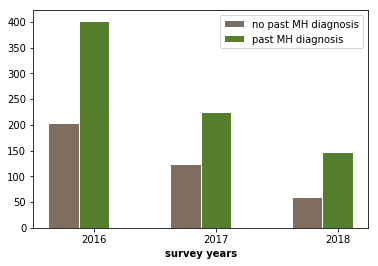

In [13]:
#bar graph to plot past MH disorder and years

#put age ranges in a list
years = ["2016", "2017", "2018"]
#set bar width
barWidth = 0.25
#set heights of bars
bars_no = [203, 123, 60]
bars_yes = [402, 225, 147]


#set position of bar on X axis
r_no = np.arange(len(bars_no))
r_yes = [x + barWidth for x in r_no]

fig = plt.figure()
#make the plot
plt.bar(r_no, bars_no, color='#7f6d5f', width=barWidth, edgecolor='white', label='no past MH diagnosis')
plt.bar(r_yes, bars_yes, color='#557f2d', width=barWidth, edgecolor='white', label= 'past MH diagnosis')

#add xticks on the middle of the group bars
plt.xlabel('survey years', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars_no))], years)

#create legend
plt.legend()

#export to file
fig.savefig("past_mh.png")

#show plot
plt.show()


In [97]:
#how many have sought treatment
treatment_2018 = survey_2018["sought treatment"].sum()
treatment_2017 = survey_2017["sought treatment"].sum()
treatment_2016 = survey_2016["sought treatment"].sum()

#total responses
total_response_2018 = survey_2018["sought treatment"].count()
total_response_2017 = survey_2017["sought treatment"].count()
total_response_2016 = survey_2016["sought treatment"].count()


print(f"In 2018 {treatment_2018} out of {total_response_2018} sought treatment for a MH disorder")
print(f"In 2017 {treatment_2017} out of {total_response_2017} sought treatment for a MH disorder")
print(f"In 2016 {treatment_2016} out of {total_response_2016} sought treatment for a MH disorder")

In 2018 194 out of 283 sought treatment for a MH disorder
In 2017 304 out of 456 sought treatment for a MH disorder
In 2016 456 out of 716 sought treatment for a MH disorder


In [99]:
#company related descriptors - 2018
size_2018 = survey_2018.groupby("size").count()
size_2018 = size_2018.reset_index()
size_2018 = size_2018[["size", "#"]]
size_2018 = size_2018.rename(columns={"#": "2018"})

#company related descriptors - 2017
size_2017 = survey_2017.groupby("size").count()
size_2017 = size_2017.reset_index()
size_2017 = size_2017[["size", "#"]]
size_2017 = size_2017.rename(columns={"#": "2017"})

#company related descriptors - 2016
size_2016 = survey_2016.groupby("size").count()
size_2016 = size_2016.reset_index()
size_2016 = size_2016[["size", "age"]]
size_2016 = size_2016.rename(columns={"age": "2016"})

#merge data frames
combo_size = pd.merge(size_2017, size_2018, on="size")
combo_size = pd.merge(size_2016, combo_size, on="size")
combo_size


,size,2016,2017,2018
0,100-500,167,155,68
1,26-100,182,84,50
2,500-1000,46,39,25
3,6-25,147,59,50
4,More than 1000,174,117,90


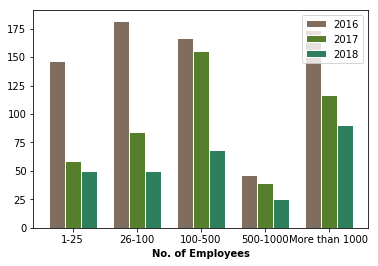

In [14]:
#bar graph to plot company size and years

#put age ranges in a list
groups = ["1-25", "26-100", "100-500", "500-1000", "More than 1000"]
#set bar width
barWidth = 0.25
#set heights of bars
bars_2016 = [147, 182, 167, 46, 174]
bars_2017 = [59, 84, 155, 39, 117]
bars_2018 = [50, 50,68, 25, 90]

#set position of bar on X axis
r_2016 = np.arange(len(bars_2016))
r_2017 = [x + barWidth for x in r_2016]
r_2018 = [x + barWidth for x in r_2017]

fig = plt.figure()
#make the plot
plt.bar(r_2016, bars_2016, color='#7f6d5f', width=barWidth, edgecolor='white', label='2016')
plt.bar(r_2017, bars_2017, color='#557f2d', width=barWidth, edgecolor='white', label= '2017')
plt.bar(r_2018, bars_2018, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')

#add xticks on the middle of the group bars
plt.xlabel('No. of Employees', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars_2016))], groups)

#create legend
plt.legend()

#export to file
fig.savefig("company_size.png")

#show plot
plt.show()

In [16]:
#how many companies have mh benefits - 2018
MH_benefits_2018 = survey_2018.groupby("MH benefits").count()
MH_benefits_2018 = MH_benefits_2018.reset_index()
MH_benefits_2018 = MH_benefits_2018[["MH benefits", "#"]]
MH_benefits_2018 = MH_benefits_2018.rename(columns={"#": "2018"})

#how many compaines have mh benefits - 2017
MH_benefits_2017 = survey_2017.groupby("MH benefits").count()
MH_benefits_2017 = MH_benefits_2017.reset_index()
MH_benefits_2017 = MH_benefits_2017[["MH benefits", "#"]]
MH_benefits_2017 = MH_benefits_2017.rename(columns={"#": "2017"})

#how many compaines have mh benefits - 2016
MH_benefits_2016 = survey_2016.groupby("MH benefits").count()
MH_benefits_2016 = MH_benefits_2016.reset_index()
MH_benefits_2016 = MH_benefits_2016[["MH benefits", "size"]]
MH_benefits_2016 = MH_benefits_2016.rename(columns={"size": "2016"})

#merge dataframes
combo_MH_benefits = pd.merge(MH_benefits_2017, MH_benefits_2018, on="MH benefits")
combo_MH_benefits = pd.merge(MH_benefits_2016, combo_MH_benefits, on="MH benefits")
combo_MH_benefits

,MH benefits,2016,2017,2018
0,I don't know,198,118,62
1,No,70,17,16
2,Yes,427,312,193


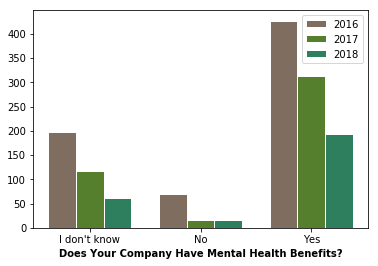

In [17]:
#bar graph to plot age ranges and years

#put age ranges in a list
groups = combo_MH_benefits["MH benefits"].to_list()
#set bar width
barWidth = 0.25
#set heights of bars
bars_2016 = combo_MH_benefits["2016"].to_list()
bars_2017 = combo_MH_benefits["2017"].to_list()
bars_2018 = combo_MH_benefits["2018"].to_list()

#set position of bar on X axis
r_2016 = np.arange(len(bars_2016))
r_2017 = [x + barWidth for x in r_2016]
r_2018 = [x + barWidth for x in r_2017]

fig = plt.figure()
#make the plot
plt.bar(r_2016, bars_2016, color='#7f6d5f', width=barWidth, edgecolor='white', label='2016')
plt.bar(r_2017, bars_2017, color='#557f2d', width=barWidth, edgecolor='white', label= '2017')
plt.bar(r_2018, bars_2018, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')

#add xticks on the middle of the group bars
plt.xlabel('Does Your Company Have Mental Health Benefits?', fontweight='bold')
plt.xticks([r+barWidth for r in range(len(bars_2016))], groups)

#create legend
plt.legend()

#export to file
fig.savefig("MH_benefits.png")

#show plot
plt.show()

In [48]:
#mh benefits by size
benefits_size_2018 = survey_2018.groupby(["size", "MH benefits"]).count()
benefits_size_2018 = benefits_size_2018.reset_index()
benefits_size_2018 = benefits_size_2018[["size", "MH benefits", "#"]]
benefits_size_2018

,size,MH benefits,#
0,100-500,I don't know,12
1,100-500,No,2
2,100-500,Not eligible for coverage / NA,1
3,100-500,Yes,53
4,26-100,I don't know,15
5,26-100,No,2
6,26-100,Not eligible for coverage / NA,1
7,26-100,Yes,32
8,500-1000,I don't know,5
9,500-1000,Not eligible for coverage / NA,1


In [102]:
#know mh options - 2018

MH_options_2018 = survey_2018.groupby("Know MH options").count()
MH_options_2018 = MH_options_2018.reset_index()
MH_options_2018 = MH_options_2018[["Know MH options", "#"]]
MH_options_2018 = MH_options_2018.rename(columns={"#": "2018"})

#know mh options - 2017
MH_options_2017 = survey_2017.groupby("Know MH options").count()
MH_options_2017 = MH_options_2017.reset_index()
MH_options_2017 = MH_options_2017[["Know MH options", "#"]]
MH_options_2017 = MH_options_2017.rename(columns={"#": "2017"})

#know mh options - 2016
MH_options_2016 = survey_2016.groupby("Know MH options").count()
MH_options_2016 = MH_options_2016.reset_index()
MH_options_2016 = MH_options_2016[["Know MH options", "size"]]
MH_options_2016 = MH_options_2016.rename(columns={"size": "2016"})

#combine dataframes
combo_MH_options = pd.merge(MH_options_2017, MH_options_2018, on = "Know MH options")
combo_MH_options = pd.merge(MH_options_2016, combo_MH_options, on = "Know MH options")
combo_MH_options

,Know MH options,2016,2017,2018
0,No,214,212,118
1,Yes,249,227,148


In [50]:
#do they know MH options, grouped by employer size
options_size_2018 = survey_2018.groupby(["size", "Know MH options"]).count()
options_size_2018 = options_size_2018.reset_index()
options_size_2018 = options_size_2018[["size", "Know MH options", "#"]]
options_size_2018

,size,Know MH options,#
0,100-500,No,25
1,100-500,Yes,42
2,26-100,No,32
3,26-100,Yes,17
4,500-1000,No,8
5,500-1000,Yes,17
6,6-25,No,29
7,6-25,Yes,11
8,More than 1000,No,24
9,More than 1000,Yes,61


In [103]:
#is MH discussed at the company - 2018
MH_discussed_2018 = survey_2018.groupby("MH discussed").count()
MH_discussed_2018 = MH_discussed_2018.reset_index()
MH_discussed_2018 = MH_discussed_2018[["MH discussed", "#"]]
MH_discussed_2018 = MH_discussed_2018.rename(columns={"#": "2018"})

#is MH discussed at the company - 2017
MH_discussed_2017 = survey_2017.groupby("MH discussed").count()
MH_discussed_2017 = MH_discussed_2017.reset_index()
MH_discussed_2017 = MH_discussed_2017[["MH discussed", "#"]]
MH_discussed_2017 = MH_discussed_2017.rename(columns={"#": "2017"})

#is MH discussed at the company - 2016
MH_discussed_2016 = survey_2016.groupby("MH discussed").count()
MH_discussed_2016 = MH_discussed_2016.reset_index()
MH_discussed_2016 = MH_discussed_2016[["MH discussed", "size"]]
MH_discussed_2016 = MH_discussed_2016.rename(columns={"size": "2016"})

#combine dataframes
combo_mh_discussed = pd.merge(MH_discussed_2017, MH_discussed_2018, on = "MH discussed")
combo_mh_discussed = pd.merge(MH_discussed_2016, combo_mh_discussed, on = "MH discussed")
combo_mh_discussed

,MH discussed,2016,2017,2018
0,I don't know,75,61,28
1,No,508,276,172
2,Yes,133,119,83


In [52]:
#MH discussed at the company, by company size
discussed_size_2018 = survey_2018.groupby(["size", "MH discussed"]).count()
discussed_size_2018 = discussed_size_2018.reset_index()
discussed_size_2018 = discussed_size_2018[["size", "MH discussed", "#"]]
discussed_size_2018

,size,MH discussed,#
0,100-500,I don't know,11
1,100-500,No,34
2,100-500,Yes,23
3,26-100,I don't know,2
4,26-100,No,38
5,26-100,Yes,10
6,500-1000,I don't know,1
7,500-1000,No,15
8,500-1000,Yes,9
9,6-25,I don't know,1


In [105]:
#feel that they have anonymity around MH stuff - 2018

anonymity_2018 = survey_2018.groupby("anonymity").count()
anonymity_2018 = anonymity_2018.reset_index()
anonymity_2018 = anonymity_2018[["anonymity", "#"]]
anonymity_2018 = anonymity_2018.rename(columns = {"#": "2018"})

#feel that they have anonymity around MH stuff - 2017
anonymity_2017 = survey_2017.groupby("anonymity").count()
anonymity_2017 = anonymity_2017.reset_index()
anonymity_2017 = anonymity_2017[["anonymity", "#"]]
anonymity_2017 = anonymity_2017.rename(columns = {"#": "2017"})

#feel that they have anonymity around MH stuff - 2016
anonymity_2016 = survey_2016.groupby("anonymity").count()
anonymity_2016 = anonymity_2016.reset_index()
anonymity_2016 = anonymity_2016[["anonymity", "size"]]
anonymity_2016 = anonymity_2016.rename(columns = {"size": "2016"})

#combine dataframes
combo_anonymity = pd.merge(anonymity_2017, anonymity_2018, on = "anonymity")
combo_anonymity = pd.merge(anonymity_2016, combo_anonymity, on = "anonymity")
combo_anonymity

,anonymity,2016,2017,2018
0,I don't know,461,275,170
1,No,38,17,7
2,Yes,217,164,106


In [106]:
#MH resources available - 2018

mh_resources_2018 = survey_2018.groupby("MH resources").count()
mh_resources_2018 = mh_resources_2018.reset_index()
mh_resources_2018 = mh_resources_2018[["MH resources", "#"]]
mh_resources_2018 = mh_resources_2018.rename(columns={"#": "2018"})

#MH resources available - 2017
mh_resources_2017 = survey_2017.groupby("MH resources").count()
mh_resources_2017 = mh_resources_2017.reset_index()
mh_resources_2017 = mh_resources_2017[["MH resources", "#"]]
mh_resources_2017 = mh_resources_2017.rename(columns={"#": "2017"})

#MH resources available - 2016
mh_resources_2016 = survey_2016.groupby("MH resources").count()
mh_resources_2016 = mh_resources_2016.reset_index()
mh_resources_2016 = mh_resources_2016[["MH resources", "size"]]
mh_resources_2016 = mh_resources_2016.rename(columns={"size": "2016"})

#combine data frames
combo_mh_resources = pd.merge(mh_resources_2017, mh_resources_2018, on = "MH resources")
combo_mh_resources = pd.merge(mh_resources_2016, combo_mh_resources, on="MH resources")
combo_mh_resources


,MH resources,2016,2017,2018
0,I don't know,235,147,80
1,No,269,159,100
2,Yes,212,150,103


In [108]:
#looking at perceptions/conversations at work
#comfortable discussing with supervisor - 2018
comfort_sup_2018 = survey_2018.groupby("comfortable supervisor").count()
comfort_sup_2018 = comfort_sup_2018.reset_index()
comfort_sup_2018 = comfort_sup_2018[["comfortable supervisor", "#"]]
comfort_sup_2018 = comfort_sup_2018.rename(columns={"#": "2018"})

#comfortable discussing with supervisor - 2017
comfort_sup_2017 = survey_2017.groupby("comfortable supervisor").count()
comfort_sup_2017 = comfort_sup_2017.reset_index()
comfort_sup_2017 = comfort_sup_2017[["comfortable supervisor", "#"]]
comfort_sup_2017 = comfort_sup_2017.rename(columns={"#": "2017"})

#comfortable discussing with supervisor - 2016
comfort_sup_2016 = survey_2016.groupby("comfortable supervisor").count()
comfort_sup_2016 = comfort_sup_2016.reset_index()
comfort_sup_2016 = comfort_sup_2016[["comfortable supervisor", "size"]]
comfort_sup_2016 = comfort_sup_2016.rename(columns={"size": "2016"})

#combine dataframes
combo_comfort_sup = pd.merge(comfort_sup_2017, comfort_sup_2018, on = "comfortable supervisor")
combo_comfort_sup = pd.merge(comfort_sup_2016, combo_comfort_sup, on = "comfortable supervisor")
combo_comfort_sup

,comfortable supervisor,2016,2017,2018
0,Maybe,233,164,94
1,No,211,109,77
2,Yes,272,183,112


In [56]:
#comfortable discussing with supervisor, grouped by company size
sup_size_2018 = survey_2018.groupby(["comfortable supervisor", "size"]).count()
sup_size_2018 = sup_size_2018.reset_index()
sup_size_2018 = sup_size_2018[["comfortable supervisor", "size", "#"]]
sup_size_2018

,comfortable supervisor,size,#
0,Maybe,100-500,22
1,Maybe,26-100,18
2,Maybe,500-1000,8
3,Maybe,6-25,19
4,Maybe,More than 1000,27
5,No,100-500,18
6,No,26-100,10
7,No,500-1000,6
8,No,6-25,13
9,No,More than 1000,30


In [57]:
#comfortable discussing with supervisor based on whether or not MH discussed at company
sup_discussed_2018 = survey_2018.groupby(["MH discussed", "comfortable supervisor"]).count()
sup_discussed_2018 = sup_discussed_2018.reset_index()
sup_discussed_2018 = sup_discussed_2018[["MH discussed", "comfortable supervisor", "#"]]
sup_discussed_2018

,MH discussed,comfortable supervisor,#
0,I don't know,Maybe,10
1,I don't know,No,2
2,I don't know,Yes,16
3,No,Maybe,60
4,No,No,60
5,No,Yes,52
6,Yes,Maybe,24
7,Yes,No,15
8,Yes,Yes,44


In [109]:
#comfortable discussing with coworker - 2018
comfort_cowork_2018 = survey_2018.groupby("comfortable coworker").count()
comfort_cowork_2018 = comfort_cowork_2018.reset_index()
comfort_cowork_2018 = comfort_cowork_2018[["comfortable coworker", "#"]]
comfort_cowork_2018 = comfort_cowork_2018.rename(columns = {"#": "2018"})

#comfortable discussing with coworker - 2017
comfort_cowork_2017 = survey_2017.groupby("comfortable coworker").count()
comfort_cowork_2017 = comfort_cowork_2017.reset_index()
comfort_cowork_2017 = comfort_cowork_2017[["comfortable coworker", "#"]]
comfort_cowork_2017 = comfort_cowork_2017.rename(columns = {"#": "2017"})

#comfortable discussing with coworker - 2016
comfort_cowork_2016 = survey_2016.groupby("comfortable coworker").count()
comfort_cowork_2016 = comfort_cowork_2016.reset_index()
comfort_cowork_2016 = comfort_cowork_2016[["comfortable coworker", "size"]]
comfort_cowork_2016 = comfort_cowork_2016.rename(columns = {"size": "2016"})

#combine dataframes
combo_comfort_cowork = pd.merge(comfort_cowork_2017, comfort_cowork_2018, on = "comfortable coworker")
combo_comfort_cowork = pd.merge(comfort_cowork_2016, combo_comfort_cowork, on = "comfortable coworker")
combo_comfort_cowork

,comfortable coworker,2016,2017,2018
0,Maybe,306,211,128
1,No,243,105,66
2,Yes,167,140,89


In [59]:
#comfortable discussing with coworker, based on whether or not MH discussed at company
cowork_discussed_2018 = survey_2018.groupby(["MH discussed", "comfortable coworker"]).count()
cowork_discussed_2018 = cowork_discussed_2018.reset_index()
cowork_discussed_2018 = cowork_discussed_2018[["MH discussed", "comfortable coworker", "#"]]
cowork_discussed_2018

,MH discussed,comfortable coworker,#
0,I don't know,Maybe,20
1,I don't know,No,2
2,I don't know,Yes,6
3,No,Maybe,78
4,No,No,50
5,No,Yes,44
6,Yes,Maybe,30
7,Yes,No,14
8,Yes,Yes,39


In [60]:
#comfortable discussing with coworker, grouped by company size
cowork_size_2018 = survey_2018.groupby(["comfortable coworker", "size"]).count()
cowork_size_2018 = cowork_size_2018.reset_index()
cowork_size_2018 = cowork_size_2018[["comfortable coworker", "size", "#"]]
cowork_size_2018

,comfortable coworker,size,#
0,Maybe,100-500,26
1,Maybe,26-100,28
2,Maybe,500-1000,7
3,Maybe,6-25,23
4,Maybe,More than 1000,44
5,No,100-500,8
6,No,26-100,11
7,No,500-1000,9
8,No,6-25,12
9,No,More than 1000,26


In [111]:
#importance placed on physical health - 2018
importance_phys_2018 = survey_2018.groupby("Overall, how much importance does your employer place on physical health?").count()
importance_phys_2018 = importance_phys_2018.reset_index()
importance_phys_2018 = importance_phys_2018[["Overall, how much importance does your employer place on physical health?", "#"]]
importance_phys_2018 = importance_phys_2018.rename(columns = {"#": "2018"})

#importance placed on physical health - 2017
importance_phys_2017 = survey_2017.groupby("Overall, how much importance does your employer place on physical health?").count()
importance_phys_2017 = importance_phys_2017.reset_index()
importance_phys_2017 = importance_phys_2017[["Overall, how much importance does your employer place on physical health?", "#"]]
importance_phys_2017 = importance_phys_2017.rename(columns = {"#": "2017"})

#importance placed on physical health - 2016
#data not available in 2016 survey
#combine dataframes

combo_importance_phys = pd.merge(importance_phys_2017, importance_phys_2018, on = "Overall, how much importance does your employer place on physical health?")
combo_importance_phys

,"Overall, how much importance does your employer place on physical health?",2017,2018
0,0,11,12
1,1,5,4
2,2,13,11
3,3,19,19
4,4,16,8
5,5,83,58
6,6,53,38
7,7,105,54
8,8,85,46
9,9,31,16


In [62]:
#importance placed on MH - 2018
importance_mh_2018 = survey_2018.groupby("Overall, how much importance does your employer place on mental health?").count()
importance_mh_2018 = importance_mh_2018.reset_index()
importance_mh_2018 = importance_mh_2018[["Overall, how much importance does your employer place on mental health?", "#"]]
importance_mh_2018 = importance_mh_2018.rename(columns={"#": "2018"})

#importance placed on MH - 2017
importance_mh_2017 = survey_2017.groupby("Overall, how much importance does your employer place on mental health?").count()
importance_mh_2017 = importance_mh_2017.reset_index()
importance_mh_2017 = importance_mh_2017[["Overall, how much importance does your employer place on mental health?", "#"]]
importance_mh_2017 = importance_mh_2017.rename(columns={"#": "2017"})

#combine dataframes
combo_importance_mh = pd.merge(importance_mh_2017, importance_mh_2018, on = "Overall, how much importance does your employer place on mental health?")
combo_importance_mh


,"Overall, how much importance does your employer place on mental health?",2017,2018
0,0,24,22
1,1,11,12
2,2,33,20
3,3,42,32
4,4,37,23
5,5,122,67
6,6,48,28
7,7,63,38
8,8,49,24
9,9,14,9


In [112]:
#2018 Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?
less_likely_2018 = survey_2018.groupby("Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?").count()
less_likely_2018 = less_likely_2018.reset_index()
less_likely_2018 = less_likely_2018[["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?", "#"]]
less_likely_2018 = less_likely_2018.rename(columns = {"#": "2018"})

#2017 Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?
less_likely_2017 = survey_2017.groupby("Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?").count()
less_likely_2017 = less_likely_2017.reset_index()
less_likely_2017 = less_likely_2017[["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?", "#"]]
less_likely_2017 = less_likely_2017.rename(columns = {"#": "2017"})

#data not available in 2016 survey

#combine dataframes
combo_less_likely = pd.merge(less_likely_2017, less_likely_2018, on = "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?")
combo_less_likely

,Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,2017,2018
0,Maybe,72,35
1,No,234,148
2,Yes,65,45


In [113]:
#observed badly handled response? 2018
bad_response_2018 = survey_2018.groupby("bad response").count()
bad_response_2018 = bad_response_2018.reset_index()
bad_response_2018 = bad_response_2018[["bad response", "#"]]
bad_response_2018 = bad_response_2018.rename(columns = {"#": "2018"})

#observed badly handled response? 2017
bad_response_2017 = survey_2017.groupby("bad response").count()
bad_response_2017 = bad_response_2017.reset_index()
bad_response_2017 = bad_response_2017[["bad response", "#"]]
bad_response_2017 = bad_response_2017.rename(columns = {"#": "2017"})

#observed badly handled response? 2016
bad_response_2016 = survey_2016.groupby("bad response").count()
bad_response_2016 = bad_response_2016.reset_index()
bad_response_2016 = bad_response_2016[["bad response", "size"]]
bad_response_2016 = bad_response_2016.rename(columns = {"size": "2016"})

#combine dataframes
combo_bad_response = pd.merge(bad_response_2017, bad_response_2018, on = "bad response")
combo_bad_response = pd.merge(bad_response_2016, combo_bad_response, on = "bad response")
combo_bad_response

,bad response,2016,2017,2018
0,Maybe/Not sure,184,133,65
1,No,310,202,123
2,"Yes, I experienced",75,48,33
3,"Yes, I observed",121,73,62


In [115]:
#observed well handled response? 2018
positive_response_2018 = survey_2018.groupby("good response").count()
positive_response_2018 = positive_response_2018.reset_index()
positive_response_2018 = positive_response_2018[["good response", "#"]]
positive_response_2018 = positive_response_2018.rename(columns = {"#": "2018"})

#observed well handled response? 2017
positive_response_2017 = survey_2017.groupby("good response").count()
positive_response_2017 = positive_response_2017.reset_index()
positive_response_2017 = positive_response_2017[["good response", "#"]]
positive_response_2017 = positive_response_2017.rename(columns = {"#": "2017"})

#observed well handled response? 2016
positive_response_2016 = survey_2016.groupby("good response").count()
positive_response_2016 = positive_response_2016.reset_index()
positive_response_2016 = positive_response_2016[["good response", "size"]]
positive_response_2016 = positive_response_2016.rename(columns = {"size": "2016"})

#combine dataframes
combo_positive_response = pd.merge(positive_response_2017, positive_response_2018, on = "good response")
combo_positive_response = pd.merge(positive_response_2016, combo_positive_response, on = "good response", how = "outer")
combo_positive_response

,good response,2016,2017,2018
0,Maybe,72.0,NaN,NaN
1,No,125.0,144.0,101.0
2,Yes,124.0,NaN,NaN
3,Maybe/Not sure,NaN,127.0,60.0
4,"Yes, I experienced",NaN,87.0,62.0
5,"Yes, I observed",NaN,98.0,60.0
